<a href="https://colab.research.google.com/github/vn322/RUDN_Lab_Works/blob/main/%D0%9C%D0%B0%D1%82%D1%80%D0%B8%D1%87%D0%BD%D1%8B%D0%B5_%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%D1%8B_%D0%B4%D0%BB%D1%8F_%D0%BD%D0%B0%D1%85%D0%BE%D0%B6%D0%B4%D0%B5%D0%BD%D0%B8%D1%8F_%D1%81%D0%BE%D0%B1%D1%81%D1%82%D0%B2%D0%B5%D0%BD%D0%BD%D1%8B%D1%85_%D1%87%D0%B8%D1%81%D0%B5%D0%BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from copy import copy




def jacobi_rotations_method(matrix: np.ndarray,
                            num_iterations: int = 1000,
                            plot: bool = True,
                            epsilon: float = 1e-3) -> tuple[np.ndarray, np.ndarray]:
    """
    Метод вращений Якоби для поиска всех собственных значений и собственных векторов матрицы.

    Аргументы:
    matrix: np.ndarray - входная матрица
    num_iterations: int - максимальное количество итераций (по умолчанию 1000)
    plot: bool - флаг для построения графика сходимости (по умолчанию False)
    epsilon: float - порог сходимости (по умолчанию 1e-8)

    Возвращает:
    tuple[np.ndarray, np.ndarray]: собственные значения и матрица вращений Якоби
    """

    n = len(matrix)

    cumulative_rot = np.identity(n)
    convergence_history = []

    for _ in range(num_iterations):

        max_off_diag = -1.0
        row, col = 0, 0
        for i in range(n - 1):
            for j in range(i + 1, n):
                if abs(matrix[i, j]) > max_off_diag:
                    max_off_diag = abs(matrix[i, j])
                    row, col = i, j

        convergence_history.append(max_off_diag)

        if max_off_diag < epsilon:
            break

        a_ii = matrix[row, row]
        a_jj = matrix[col, col]
        a_ij = matrix[row, col]
        if abs(a_ij) < epsilon:
            theta = 0.5 * np.pi if a_ii > a_jj else -0.5 * np.pi
        else:
            if a_ii != a_jj:
                theta = 0.5 * np.arctan(2 * a_ij / (a_ii - a_jj))
            else:
                theta = np.pi / 4

        c = np.cos(theta)
        s = np.sin(theta)
        rotation_matrix = np.identity(n)
        rotation_matrix[row, row] = c
        rotation_matrix[row, col] = -s
        rotation_matrix[col, row] = s
        rotation_matrix[col, col] = c

        matrix = rotation_matrix.T @ matrix @ rotation_matrix

    if plot:
        plt.figure(figsize=(8, 6))
        plt.plot(range(len(convergence_history)), convergence_history, marker='o', linestyle='-', linewidth=3)
        plt.xlabel('Итерация')
        plt.ylabel('Модуль наибольшего внедиагонального элемента')
        plt.title('Зависимость модуля наибольшего внедиагонального элемента от номера итерации')
        plt.grid(True)

        plt.savefig('jacobi_rotations_plot.png')
        plt.show()
        plt.close()

    eigenvalues = np.diag(matrix)
    cumulative_rot = cumulative_rot @ rotation_matrix

    return eigenvalues, cumulative_rot



In [22]:
matrix = np.array([[1,2],[3,4]])

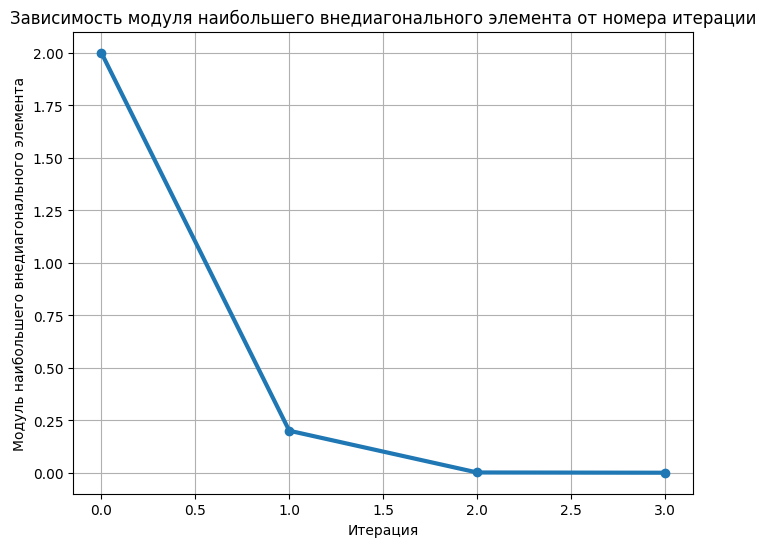

(array([-0.37228133,  5.37228133]),
 array([[ 9.99999979e-01, -2.06238632e-04],
        [ 2.06238632e-04,  9.99999979e-01]]))

In [35]:
jacobi_rotations_method(matrix)

# metods

1. Метод степенной итерации
Находит наибольший по модулю собственный вектор и соответствующее ему собственное значение. При необходимости может построить график для визуализации сходимости итерационного процесса.

2. Метод вращений Якоби
Подходит для симметричных матриц и находит все собственные числа и вектора. Использует итеративное применение преобразования поворота для обнуления наддиагональных элементов.

3. QR метод
Работает с любыми матрицами и основан на итеративном перемножении элементов QR-разложения согласно определенной формуле. Возвращает массив всех собственных значений матрицы.

4. Прямой метод раскрытия определителя
Находит все собственные числа матрицы с помощью решения характеристического уравнения. Составление характеристического полинома реализовано самостоятельно, нахождение его корней - с помощью метода из numpy.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from copy import copy


def qr_decomposition(matrix: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    """
    QR-разложение матрицы.

    Аргументы:
    matrix: np.ndarray - входная матрица

    Возвращает:
    tuple[np.ndarray, np.ndarray]: Q и R матрицы из QR-разложения
    """
    n = matrix.shape[0]

    Q = np.zeros((n, n), dtype=float)
    R = np.zeros((n, n), dtype=float)

    for i in range(n):

        v = matrix[:, i].astype(float)

        for j in range(i):
            R[j, i] = np.dot(Q[:, j], matrix[:, i])
            v -= R[j, i] * Q[:, j]

        R[i, i] = np.linalg.norm(v)
        Q[:, i] = v / R[i, i]

    return Q, R


def qr_method(matrix: np.ndarray,
              num_iterations: int = 1000,
              plot: bool = False,
              epsilon: float = 1e-8) -> np.ndarray:
    """
    Метод QR-итераций для поиска собственных значений матрицы.

    Аргументы:
    matrix: np.ndarray - входная матрица
    plot: bool - флаг для построения графика сходимости (по умолчанию False)
    num_iterations: int - максимальное количество итераций (по умолчанию 1000)
    epsilon: float - порог сходимости (по умолчанию 1e-8)

    Возвращает:
    np.ndarray: собственные значения матрицы
    """

    convergence_history = []
    A_k = copy(matrix).astype(float)
    for i in range(num_iterations):
        Q, R = qr_decomposition(A_k)

        convergence = np.linalg.norm(np.diagonal(A_k) - np.diagonal(R @ Q))

        A_k = R @ Q

        convergence_history.append(convergence)

        if convergence < epsilon:
            break

    if plot:
        plt.figure(figsize=(8, 6))
        plt.plot(range(len(convergence_history)), convergence_history, marker='o', linestyle='-', linewidth=3)
        plt.xlabel('Итерация')
        plt.ylabel('Норма разности векторов из диагональных элементов')
        plt.title('Зависимость нормы разности векторов из диагональных элементов от номера итерации')
        plt.grid(True)

        plt.savefig('qr_method_plot.png')
        plt.close()

    return np.diagonal(A_k)


def power_iteration_method(matrix: np.ndarray,
                           plot: bool = False,
                           num_iterations: int = 1000,
                           epsilon: float = 1e-8) -> tuple[float, np.ndarray]:
    """
    Метод итераций для поиска наибольшего по модулю собственного значения и соответствующего собственного вектора.

    Аргументы:
    matrix: np.ndarray - входная матрица
    plot: bool - флаг для построения графика сходимости (по умолчанию False)
    num_iterations: int - максимальное количество итераций (по умолчанию 1000)
    epsilon: float - порог сходимости (по умолчанию 1e-8)

    Возвращает:
    tuple[float, np.ndarray]: наибольшее по модулю собственное значение и соответствующий собственный вектор
    """

    if matrix.shape[0] != matrix.shape[1]:
        raise ValueError("Incorrect shape of matrix")

    vector = np.random.rand(matrix.shape[0])
    vector = vector / np.linalg.norm(vector)

    convergence_history = []

    for i in range(num_iterations):
        new_vector = matrix @ vector
        new_vector = new_vector / np.linalg.norm(new_vector)

        convergence = np.linalg.norm(new_vector - vector)
        convergence_history.append(convergence)

        if convergence < epsilon:
            break

        vector = new_vector

    eigenvalue = np.linalg.norm(matrix @ vector) / np.linalg.norm(vector)

    if plot:
        plt.figure(figsize=(8, 6))
        plt.plot(range(len(convergence_history)), convergence_history, marker='o', linestyle='-', linewidth=3)
        plt.xlabel('Итерация')
        plt.ylabel('Сходимость')
        plt.title('Зависимость сходимости от итерации')
        plt.grid(True)

        plt.savefig('power_iter_plot.png')
        plt.close()

    return eigenvalue, vector


def jacobi_rotations_method(matrix: np.ndarray,
                            num_iterations: int = 1000,
                            plot: bool = False,
                            epsilon: float = 1e-8) -> tuple[np.ndarray, np.ndarray]:
    """
    Метод вращений Якоби для поиска всех собственных значений и собственных векторов матрицы.

    Аргументы:
    matrix: np.ndarray - входная матрица
    num_iterations: int - максимальное количество итераций (по умолчанию 1000)
    plot: bool - флаг для построения графика сходимости (по умолчанию False)
    epsilon: float - порог сходимости (по умолчанию 1e-8)

    Возвращает:
    tuple[np.ndarray, np.ndarray]: собственные значения и матрица вращений Якоби
    """

    n = len(matrix)

    for i in range(n):
        for j in range(n):
            if not np.isclose(matrix[i][j], matrix[j][i]):
                raise ValueError("Matrix is not symmetric")

    cumulative_rot = np.identity(n)
    convergence_history = []

    for _ in range(num_iterations):

        max_off_diag = -1.0
        row, col = 0, 0
        for i in range(n - 1):
            for j in range(i + 1, n):
                if abs(matrix[i, j]) > max_off_diag:
                    max_off_diag = abs(matrix[i, j])
                    row, col = i, j

        convergence_history.append(max_off_diag)

        if max_off_diag < epsilon:
            break

        a_ii = matrix[row, row]
        a_jj = matrix[col, col]
        a_ij = matrix[row, col]
        if abs(a_ij) < epsilon:
            theta = 0.5 * np.pi if a_ii > a_jj else -0.5 * np.pi
        else:
            if a_ii != a_jj:
                theta = 0.5 * np.arctan(2 * a_ij / (a_ii - a_jj))
            else:
                theta = np.pi / 4

        c = np.cos(theta)
        s = np.sin(theta)
        rotation_matrix = np.identity(n)
        rotation_matrix[row, row] = c
        rotation_matrix[row, col] = -s
        rotation_matrix[col, row] = s
        rotation_matrix[col, col] = c

        matrix = rotation_matrix.T @ matrix @ rotation_matrix

    if plot:
        plt.figure(figsize=(8, 6))
        plt.plot(range(len(convergence_history)), convergence_history, marker='o', linestyle='-', linewidth=3)
        plt.xlabel('Итерация')
        plt.ylabel('Модуль наибольшего внедиагонального элемента')
        plt.title('Зависимость модуля наибольшего внедиагонального элемента от номера итерации')
        plt.grid(True)

        plt.savefig('jacobi_rotations_plot.png')
        plt.close()

    eigenvalues = np.diag(matrix)
    cumulative_rot = cumulative_rot @ rotation_matrix

    return eigenvalues, cumulative_rot


def calc_det(matrix: np.ndarray) -> np.ndarray:
    """
    Рекурсивно вычисляет определитель квадратной матрицы методом разложения по первой строке.

    Аргументы:
    - matrix (np.ndarray): Исходная квадратная матрица.

    Возвращает:
    - np.ndarray: Определитель матрицы.
    """

    n = matrix.shape[0]
    if n == 1:
        return matrix[0][0]

    result = np.array([0])

    for i in range(n):
        sign = 1 if i % 2 == 0 else -1
        minor = np.delete(np.delete(matrix, 0, axis=0), i, axis=1)
        result = np.polyadd(result,
                            sign * np.polymul(matrix[0][i], calc_det(minor)))

    return result


def get_characteristic_polynomial(matrix: np.ndarray) -> np.ndarray:
    """
    Возращает коэффиценты характеристического полинома матрицы

    Аргументы:
    - matrix (np.ndarray): Исходная квадратная матрица.

    Возвращает:
    - np.ndarray:  Коэффициенты характеристического полинома матрицы
    """

    if matrix.shape[0] != matrix.shape[1]:
        raise ValueError("Матрица должна быть квадратной")

    n = matrix.shape[0]
    new_matrix = np.zeros((n, n, 2))

    for i in range(n):
        for j in range(n):
            if i == j:
                new_matrix[i][j] = np.array([-1, matrix[i][j]])
            else:
                new_matrix[i][j] = np.array([0, matrix[i][j]])

    return calc_det(new_matrix)

def direct_method(matrix: np.ndarray) -> np.ndarray:
    """
    Поиск собственных чисел, как корней характеристического полинома

    Аргументы:
    - matrix (np.ndarray): Исходная квадратная матрица.

    Возвращает:
    - np.ndarray: Массив собственных чисел.
    """

    poly = get_characteristic_polynomial(matrix)

    print(poly)
    return np.roots(poly)